---

Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Prepare)

Today's guided module project will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills. The competition will begin

## Learning Objectives
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Overview

Sklearn pipelines allow you to stitch together multiple components of a machine learning process. The idea is that you can pass you raw data and get predictions out of the pipeline. This ability to pass raw input and receive a prediction from a singular class makes pipelines well suited for production, because you can pickle a a pipeline without worry about other data preprocessing steps. 

*Note:* Each time we call the pipeline during grid search, each component is fit again. The vectorizer (tf-idf) is transforming our entire vocabulary during each cross-validation fold. That transformation adds significant run time to our grid search. There *might* be interactions between the vectorizer and our classifier, so we estimate their performance together in the code below. However, if your goal is to reduce run time. Train your vectorizer separately (ie out of the grid-searched pipeline). 

In [2]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

In [3]:
# Dataset
from sklearn.datasets import fetch_20newsgroups

# 2 categories to class today
categories = ['alt.atheism',
              'talk.religion.misc']

data = fetch_20newsgroups(subset='all', 
                          categories=categories)

In [4]:
# prep data, instantiate a model, create pipeline object,and run a gridsearch 
X = data.data
Y = data.target

In [5]:
# create pipeline components 
tfidf = TfidfVectorizer(stop_words="english")

rfc = RandomForestClassifier()

In [6]:
# Pipeline docs: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# create the pipeline object
pipe = Pipeline([("vect", tfidf),
                 ("clf", rfc)])

In [7]:
# create our hyper-parameter dictionary to pass into gridsearch 
parameters = {
    # included parameters for the vectorizer
    "vect__max_df": (0.75, 1.0), 
    "vect__min_df": (2, 10), 
    "vect__max_features": (500, 1000), 
    # included parameters for the ML model 
    "clf__n_estimators": (10, 100), 
    "clf__max_depth": (None, 10)   
}

In [8]:
# instantiate our gridsearch 
gs = GridSearchCV(pipe,
                 parameters, 
                 cv=3, # set cv to 3 to min runtime of gridsearch, but otherwise set to min of 5 or even 10 
                 n_jobs=11, # as a rule, set n_jobs to N - 1, where N is the total number of processors 
                 verbose=1)

In [9]:
# run gridsearch
gs.fit(X, Y)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=11,
             param_grid={'clf__max_depth': (None, 10),
                         'clf__n_estimators': (10, 100),
                         'vect__max_df': (0.75, 1.0),
                         'vect__max_features': (500, 1000),
                         'vect__min_df': (2, 10)},
             verbose=1)

In [10]:
gs.best_score_

0.8976927613150524

In [11]:
gs.best_params_

{'clf__max_depth': None,
 'clf__n_estimators': 100,
 'vect__max_df': 0.75,
 'vect__max_features': 1000,
 'vect__min_df': 10}

In [12]:
best_model = gs.best_estimator_

In [13]:
Y_test = best_model.predict(X_test)

NameError: name 'X_test' is not defined

In [ ]:
# use provided code to get predictions in the format that kaggle wants 

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

## Challenge

You're trying to achieve 75% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Overview

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1538411402/image3_maagmh.png)

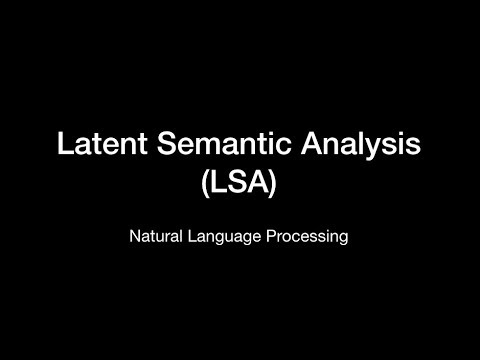

In [37]:
from IPython.display import YouTubeVideo
# Check out this 4 minute video for a deeper discussion on LSA
YouTubeVideo('OvzJiur55vo')

In [ ]:
# Import

from sklearn.decomposition import TruncatedSVD

# build a pipeline, incorporate SVD, and run a gridsearch 

# create vectorizer object
tfidf = TfidfVectorizer()

# create TruncatedSVD object
svd = TruncatedSVD()

# create classifer 
rfc = RandomForestClassifier()

# create pipeline objects
# lsi = vectorization + SVD
lsi = Pipeline([("vect", tfidf), 
                ("svd", svd)])

pipe = Pipeline([("lsi", lsi), 
                 ("clf", rfc)])

# create parameter dict
params = {
    # n_components means number of topics 
    "lsi__svd__n_components": [10, 100], 
    "lsi__vect__max_features": [500, 1000], 
    "clf__n_estimators": [10, 100, 1000]
    
}

# create gridsearch
gs = GridSearchCV(pipe, 
                  params, 
                  cv=3, 
                  n_jobs=11, 
                  verbose=1)

gs.fit(X, Y)

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

In [ ]:
best_model = gs.best_estimator_
#Y_test = best_model.predict(X_test)

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

# Overview

In [15]:
import spacy
import pandas as pd

# build a model that is trained on word vectors 

# load in pre-trained w2v model 
nlp = spacy.load("en_core_web_lg")

In [16]:
# review of w2v word vectors
doc = "banana"
vec = nlp(doc).vector

In [17]:
# create a function that returns word vectors

def clean_data(doc):
    """
    Cleans document by removing undesirable text such as leading whitespaces, emails, speical chars (i.e %, $, \n), and so on. 
    
    Parameters
    ----------
    doc: string
    
    Returns
    -------
    doc: string
    
    Example
    -------
    It is suggested that this function, once you fill it out, is used as follows:
    
    df.text = df.text.apply(lambda doc: clean_data(doc))
    """
    pass

def get_word_vectors(docs):
    """
    Iterates through corpus and returns a list of doc vectors
    
    This serves as both our tokenizer and vectorizer.
    
    Returns
    -------
    doc-term matrix: list of arrays
    """
    

    return [nlp(doc).vector for doc in docs]

In [40]:
# load data
df_train = pd.read_csv(data_dir + "train.csv")
df_test = pd.read_csv(data_dir + "test.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alexanderbarriga/Unit_4/DS-Unit-4-Sprint-1-NLP/module3-document-classification/Kaggle Data/train.csv'

In [18]:
# save input data to variables 
X_train_text = df_train.description
X_test_text = df_test.description

NameError: name 'df_train' is not defined

In [19]:
# get word vectors for train and test sets
X_train = get_word_vectors(X_train_text)
X_test = get_word_vectors(X_test_text)

NameError: name 'X_train_text' is not defined

In [1]:
type(X_train)

NameError: name 'X_train' is not defined

In [56]:
# create Y vector (i.e. our prediction labels)
Y_train = df_train.ratingCategory

In [57]:
# create RF model using OOB?
rfc = RandomForestClassifier(oob_score=True)

In [58]:
rfc.fit(X_train, Y_train);

In [61]:
rfc.score(X_train, Y_train)

1.0

In [60]:
# the out of bag score that is calculated by using the portion of the train set that isn't sampled during Bootstrap Aggragation 
rfc.oob_score_

0.7210667971617323

## Follow Along

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Review

To review this module: 
* Continue working on the Kaggle competition
* Find another text classification task to work on